# NIST Pin Location Errors

Data provided by John S. on 2/29/2016 ("EOS 290 Calibration for Maraging Steel" worksheet "Pin and Hole Locations").


In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
%matplotlib notebook 

__author__ = "mjp"
__version__ = "0.0.1"
__status__ = "development"

__copyright__ = "Copyright 2016, JHU/APL"
__license__ = "Apache, Version 2.0"

import os, csv

import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import axes3d, art3d

from helpers import plot_xy_err_2d, cart2polar

In [52]:
def load_data(fn):
    "Load data sets from three different experiments."
    X = []
    D1 = []
    D2 = []
    D3 = []
    
    with open(fn, 'rU') as f:
        reader = csv.reader(f, delimiter=',')
        for rowIdx, row in enumerate(reader):
            # skip anything that isn't a pin measurement
            if not row[0].startswith('Pin'):
                continue
                
            # there's a blank column in this worksheet
            row = [x for x in row if len(x)]
                
            data = [float(v) for v in row[1:]]
            x, y = data[0:2]
            dx1, dy1 = data[2:4]
            dx2, dy2 = data[4:6]
            dx3, dy3 = data[6:]
            
            X.append((x,y))
            D1.append((dx1, dy1))
            D2.append((dx2, dy2))
            D3.append((dx3, dy3))
            
    return np.array(X), np.array(D1), np.array(D2), np.array(D3)


def rot_matrix_2d(phi):
    "clockwise rotation in 2d"
    return np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])

<IPython.core.display.Javascript object>


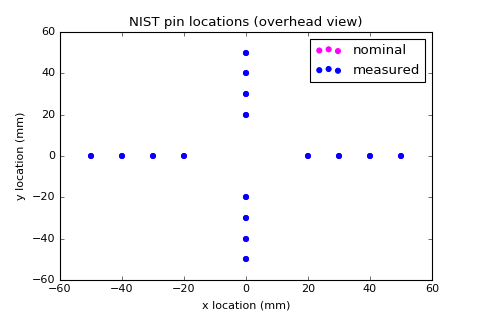

In [61]:
Xn, D1, D2, D3 = load_data('/Users/pekalmj1/Documents/bb/gpam/data/NIST_EOS_290_Maraging_Steel/pin_and_hole_locations.csv')
assert(X.shape[0] == 16)  # there should be 16 pins
#print np.concatenate((X,Y3), axis=1)

units = '(mm)'
rN, thetaN = cart2polar(Xn[:,0], Xn[:,1])  # nominal locations in polar coordinates

# From the spreadsheet, it seems that:
#    delta_x := x_nominal - X_measured
Xm1 = Xn - D1
Xm2 = Xn - D2
Xm3 = Xn - D3


plt.figure()
plt.scatter(Xn[:,0], Xn[:,1], color='magenta')
plt.scatter(Xm1[:,0], Xm1[:,1], color='blue')
plt.legend(['nominal', 'measured'])
plt.title('NIST pin locations (overhead view)')
plt.xlabel('x location ' + units)
plt.ylabel('y location ' + units)

## MS1 Trial 1


In [60]:
# original observations
#plot_xy_err_2d(theta, D1[:,0], D1[:,1], xLabel='theta (nominal)')
#plot_xy_err_2d(r, D1[:,0], D1[:,1], xLabel='r (nominal)')

Xm1  = X + D1;

phi = np.pi/1100.0 
X1hat = np.dot(rot_matrix_2d(phi), (X + D1).T).T
D1hat = X - X1hat;

print [D1, D1hat]

[array([[-0.0172,  0.0344],
       [-0.0251,  0.0302],
       [-0.0136,  0.0168],
       [ 0.0097,  0.0112],
       [ 0.0039, -0.0008],
       [ 0.007 ,  0.0124],
       [ 0.0082,  0.0014],
       [-0.0016, -0.0187],
       [ 0.0241,  0.0183],
       [ 0.0109,  0.0228],
       [ 0.0214,  0.0179],
       [-0.0054,  0.0116],
       [-0.0138,  0.0087],
       [-0.0127, -0.0028],
       [-0.0189, -0.0161],
       [-0.0136,  0.0071]]), array([[-0.0173056 , -0.10835049],
       [-0.02517678, -0.08396802],
       [-0.01367431, -0.06884091],
       [ 0.00965038, -0.04594754],
       [ 0.00397927,  0.05630865],
       [ 0.00715774,  0.09805964],
       [ 0.0083671 ,  0.11561615],
       [-0.00144948,  0.12410412],
       [-0.11864731,  0.01843501],
       [-0.10327451,  0.02293191],
       [-0.06422865,  0.01796116],
       [-0.06248664,  0.01169694],
       [ 0.04334469,  0.00865781],
       [ 0.07297174, -0.00288607],
       [ 0.09529367, -0.01620909],
       [ 0.1292198 ,  0.0069349 ]])]


In fact, if we apply a small clockwise rotation about the $z$ axis to the observed pin locations and compare these new adjusted locations to the design points, one observes a dramatic decrease in the location errors in $x$ and $y$.

Rotating observed pin locations about z axis
l2 error squared in x and y dimensions for original measurements: 2.53e+05 2.99e+05
l2 error squared in x and y dimensions for rotated measurements: 1.83e+04 8.72e+03


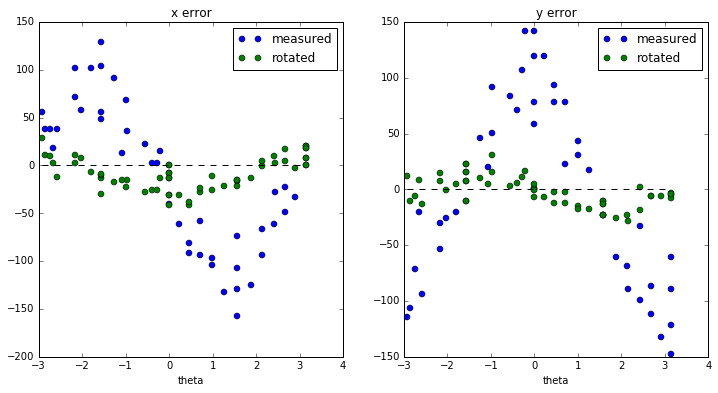

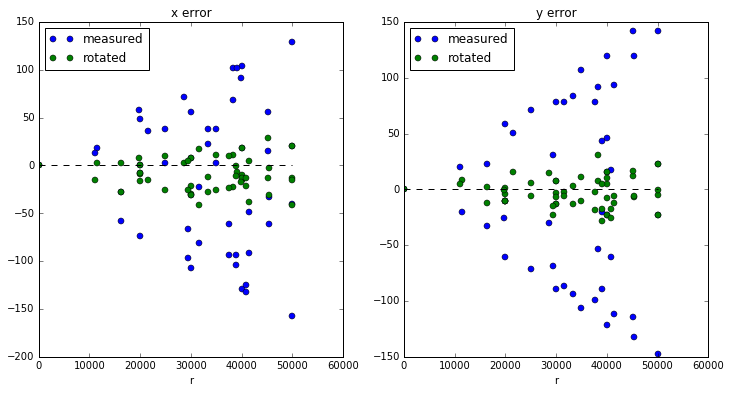

In [8]:
# correction factor
alpha = np.pi/1100.0 
rotClockwise = np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])
print('Rotating observed pin locations about z axis')

# Variables with tildes are the "corrected" versions of the hats (observations)
obsHat = np.vstack((xHat, yHat))
obsTilde = np.dot(rotClockwise, obsHat)
xTilde = obsTilde[0,:]
yTilde = obsTilde[1,:]

xErrl2 = np.sum((xHat - x)**2)
yErrl2 = np.sum((yHat - y)**2)
print('l2 error squared in x and y dimensions for original measurements: %0.2e %0.2e') % (xErrl2, yErrl2)

xErrl2 = np.sum((xTilde - x)**2)
yErrl2 = np.sum((yTilde - y)**2)
print('l2 error squared in x and y dimensions for rotated measurements: %0.2e %0.2e') % (xErrl2, yErrl2)


# show both sets of errors
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
plt.plot(theta, xHat-x, 'bo')
plt.plot(theta, xTilde-x, 'go')
plt.legend(['measured', 'rotated'])
plt.plot([np.min(theta), np.max(theta)], [0,0], 'k--')
ax.set_xlabel('theta')
ax.set_title('x error')

ax = fig.add_subplot(122)
ax.plot(theta, yHat-y, 'bo')
ax.plot(theta, yTilde-y, 'go')
plt.legend(['measured', 'rotated'])
ax.plot([np.min(theta), np.max(theta)], [0,0], 'k--')
ax.set_xlabel('theta')
ax.set_title('y error')

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
plt.plot(r, xHat-x, 'bo')
plt.plot(r, xTilde-x, 'go')
plt.legend(['measured', 'rotated'], loc='NorthWest')
plt.plot([np.min(r), np.max(r)], [0,0], 'k--')
ax.set_xlabel('r')
ax.set_title('x error')

ax = fig.add_subplot(122)
ax.plot(r, yHat-y, 'bo')
ax.plot(r, yTilde-y, 'go')
plt.legend(['measured', 'rotated'], loc='NorthWest')
ax.plot([np.min(r), np.max(r)], [0,0], 'k--')
ax.set_xlabel('r')
ax.set_title('y error')